# Bot Backtester

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

t2 = pd.read_csv("../resources/round5/trades_round_5_day_2.csv", sep=";")
t3 = pd.read_csv("../resources/round5/trades_round_5_day_3.csv", sep=";")
t3['timestamp'] += 1e6
t4 = pd.read_csv("../resources/round5/trades_round_5_day_4.csv", sep=";")
t4['timestamp'] += 2e6

p2 = pd.read_csv("../resources/round5/prices_round_5_day_2.csv", sep=";")
p3 = pd.read_csv("../resources/round5/prices_round_5_day_3.csv", sep=";")
p3['timestamp'] += 1e6
p4 = pd.read_csv("../resources/round5/prices_round_5_day_4.csv", sep=";")
p4['timestamp'] += 2e6

trades_df = pd.concat([t2, t3, t4])

prices_df = pd.concat([p2, p3, p4])

#### CHANGE THESE VALUES ####
ASSET_NAMES = [
    "VOLCANIC_ROCK", 
    # "VOLCANIC_ROCK_VOUCHER_9500", 
    # "VOLCANIC_ROCK_VOUCHER_9750",
    # "VOLCANIC_ROCK_VOUCHER_10000", 
    # "VOLCANIC_ROCK_VOUCHER_10250", 
    # "VOLCANIC_ROCK_VOUCHER_10500",
    # "RAINFOREST_RESIN",
    # "KELP",
    # "SQUID_INK",
    # "MAGNIFICENT_MACARONS",
    # "CROISSANTS",
    # "JAMS",
    # "DJEMBES",
    # "PICNIC_BASKET1",
    # "PICNIC_BASKET2",
]

name = "Caesar"
#############################

info1 = trades_df[trades_df["symbol"].isin(ASSET_NAMES)].groupby(["buyer", "symbol",]).sum().drop(["timestamp", "seller", "currency", "price"], axis=1)
info3 = trades_df[trades_df["symbol"].isin(ASSET_NAMES)].groupby(["seller", "symbol",]).sum().drop(["timestamp", "buyer", "currency", "price"], axis=1)

print(info1)
print(info3)

info2 = trades_df[(trades_df["buyer"] == name) | (trades_df["seller"] == name)]

# cap = {}
# portfolio_qty = {}
# tracking_qty = {}
# portfolio_val = {}

# market_qty_bid = {}
# market_qty_ask = {}

# divergence = {}

# pd.options.mode.chained_assignment = None

# info2 = info2[info2["symbol"].isin(ASSET_NAMES)]

# for x in range(30000)[20000:30000]:
#     timestamp = x * 100

#     current_prices = prices_df[prices_df["timestamp"] == timestamp]

#     # === Handle trades ===
#     trades = info2[info2["timestamp"] == timestamp]

#     if not trades.empty:
#         trades["value"] = trades["price"] * trades["quantity"]

#         buys = trades[trades["buyer"] == name]
#         sells = trades[trades["seller"] == name]

#         buy_summary = buys.groupby("symbol")[["quantity", "value"]].sum()
#         sell_summary = sells.groupby("symbol")[["quantity", "value"]].sum()
#         # print(sell_summary)

#         for prod in ASSET_NAMES:
#             prod_prices = current_prices[current_prices["product"] == prod]["mid_price"]
#             mid_price = prod_prices.iloc[0] if not prod_prices.empty else 0

#             buy_qty = buy_summary.at[prod, "quantity"] if prod in buy_summary.index else 0
#             buy_val = buy_summary.at[prod, "value"] if prod in buy_summary.index else 0
            
#             sell_qty = sell_summary.at[prod, "quantity"] if prod in sell_summary.index else 0
#             sell_val = sell_summary.at[prod, "value"] if prod in sell_summary.index else 0

#             if buy_qty > 0:
#                 spread = ((buy_val / buy_qty) - mid_price) * buy_qty
#                 divergence.setdefault(prod, []).append(-spread)
#             elif sell_qty > 0:
#                 spread = ((sell_val / sell_qty) - mid_price) * sell_qty
#                 divergence.setdefault(prod, []).append(spread)
#             else:
#                 divergence.setdefault(prod, []).append(0)

#             portfolio_qty[prod] = portfolio_qty.get(prod, 0) + buy_qty - sell_qty
#             cap[prod] = cap.get(prod, 0) - buy_val + sell_val

#     else: 
#         for prod in ASSET_NAMES:
#             divergence.setdefault(prod, []).append(0)

#     # === Handle prices ===
    
#     for prod in ASSET_NAMES:
#         tracking_qty.setdefault(prod, []).append(portfolio_qty.get(prod, 0))
#         bids = current_prices[current_prices["product"] == prod][["bid_volume_1", "bid_volume_2", "bid_volume_3"]].sum(axis=1)
#         asks = current_prices[current_prices["product"] == prod][["ask_volume_1", "ask_volume_2", "ask_volume_3"]].sum(axis=1)

#         print(bids, asks)

#         market_qty_bid.setdefault(prod, []).append(bids)
#         market_qty_ask.setdefault(prod, []).append(asks)
        
#         # Get the mid price for current product and timestamp
#         prod_prices = current_prices[current_prices["product"] == prod]["mid_price"]
#         mid_price = prod_prices.iloc[0] if not prod_prices.empty else 0

#         cur_val = portfolio_qty.get(prod, 0) * mid_price
#         new_portfolio = cur_val + cap.get(prod, 0)

#         portfolio_val.setdefault(prod, []).append(new_portfolio)
#     if x%1000 == 0:
#         print("iters = ", x)


# for x in tracking_qty.values():
#     plt.plot(range(10000), x)

# print(market_qty_bid.get("VOLCANIC_ROCK"))

# plt.plot(range(10000), market_qty_bid.get("VOLCANIC_ROCK"))
arr1 = np.array(market_qty_bid.get("VOLCANIC_ROCK")).reshape(1,-1)[0]
arr2 = np.array(market_qty_ask.get("VOLCANIC_ROCK")).reshape(1,-1)[0]
print(arr1[0])
print(arr2[0])
X = np.array([arr1, arr2]).T
print(X)
reg = LinearRegression().fit(X, tracking_qty.get("VOLCANIC_ROCK"))
reg.score(X, tracking_qty.get("VOLCANIC_ROCK"))

# plt.plot(range(500), portfolio_val["VOLCANIC_ROCK"])
        

                      quantity
buyer  symbol                 
Caesar VOLCANIC_ROCK     10801
Pablo  VOLCANIC_ROCK       360
Peter  VOLCANIC_ROCK      1439
                      quantity
seller symbol                 
Caesar VOLCANIC_ROCK     10579
Pablo  VOLCANIC_ROCK       388
Peter  VOLCANIC_ROCK      1633
185.0
185.0
[[185. 185.]
 [143. 143.]
 [166. 172.]
 ...
 [179. 179.]
 [186. 186.]
 [146. 146.]]


0.0003284999392135779

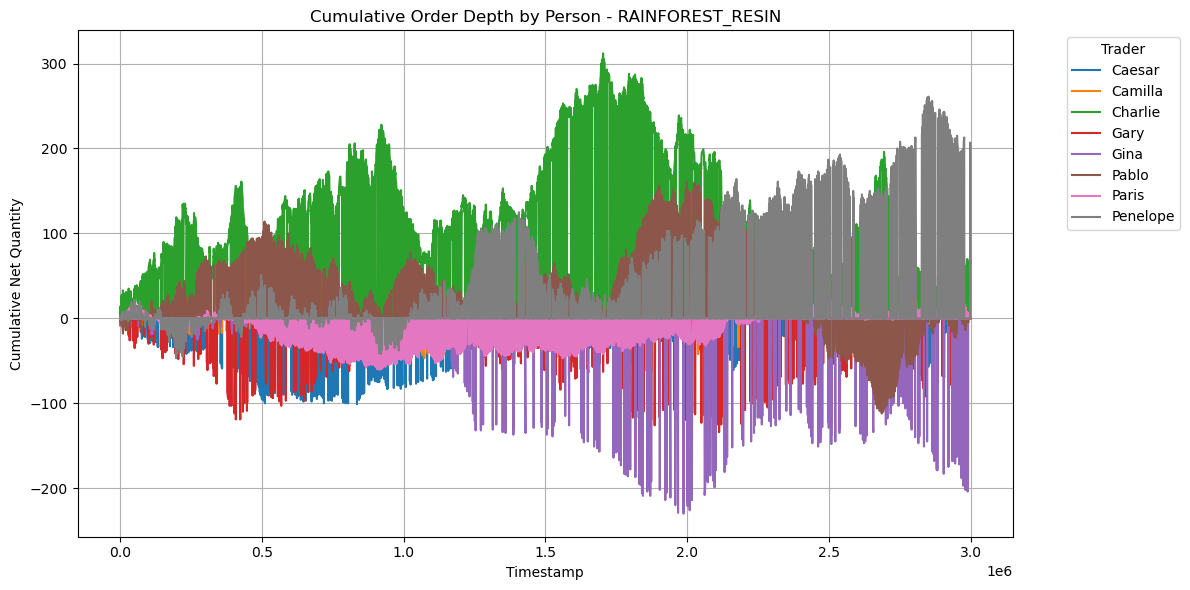

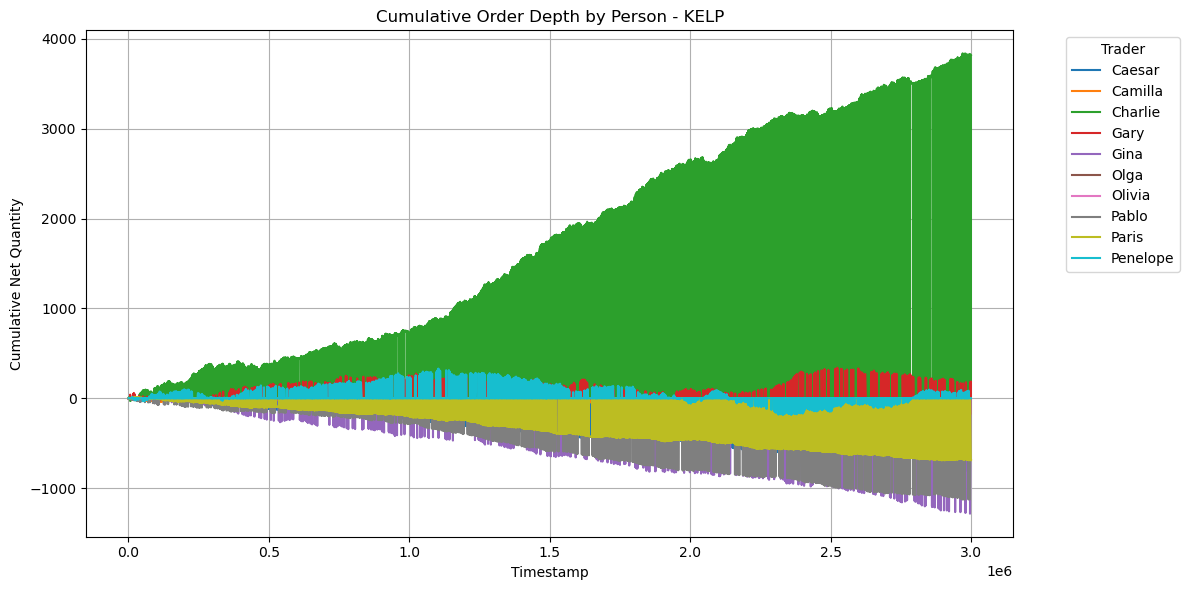

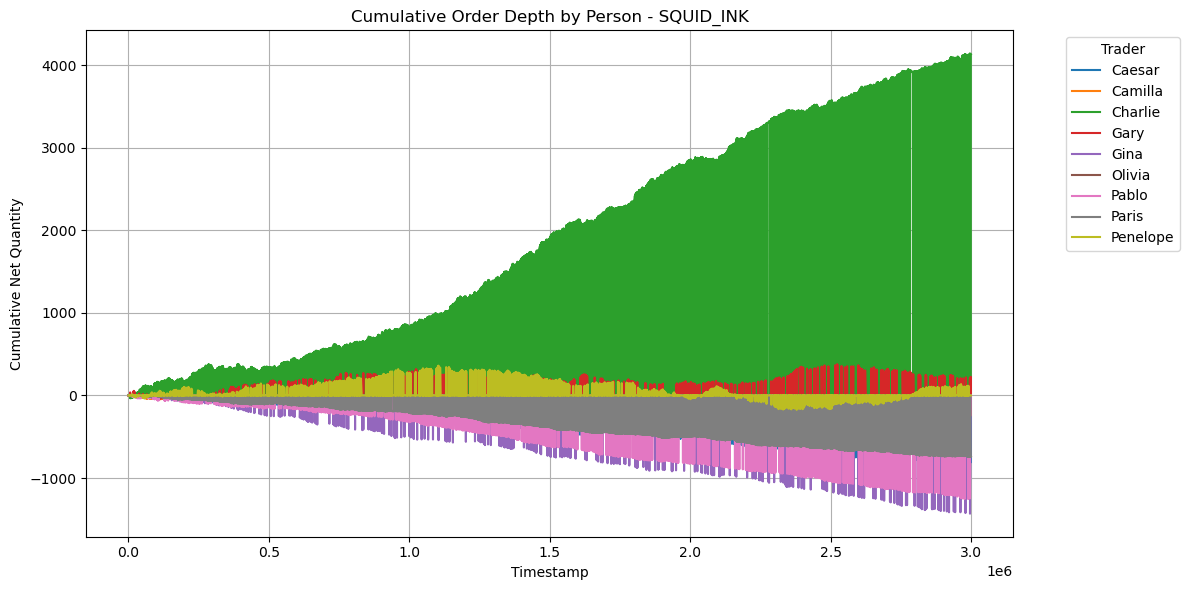

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

t2 = pd.read_csv("../resources/round5/trades_round_5_day_2.csv", sep=";")
t3 = pd.read_csv("../resources/round5/trades_round_5_day_3.csv", sep=";")
t3['timestamp'] += 1e6
t4 = pd.read_csv("../resources/round5/trades_round_5_day_4.csv", sep=";")
t4['timestamp'] += 2e6

trades_df = pd.concat([t2, t3, t4])

def expand_trades(row):
    return pd.DataFrame([
        {'person': row['buyer'], 'symbol': row['symbol'], 'price': row['price'], 'quantity': row['quantity'], 'side': 'buy'},
        {'person': row['seller'], 'symbol': row['symbol'], 'price': row['price'], 'quantity': row['quantity'], 'side': 'sell'}
    ])

# Expand trades
expanded_trades = pd.concat([expand_trades(row) for _, row in trades_df.iterrows()], ignore_index=True)

ASSET_NAMES = [
    # "VOLCANIC_ROCK", 
    # "VOLCANIC_ROCK_VOUCHER_9500", 
    # "VOLCANIC_ROCK_VOUCHER_9750",
    # "VOLCANIC_ROCK_VOUCHER_10000", 
    # "VOLCANIC_ROCK_VOUCHER_10250", 
    # "VOLCANIC_ROCK_VOUCHER_10500",
    "RAINFOREST_RESIN",
    "KELP",
    "SQUID_INK",
    # "MAGNIFICENT_MACARONS",
    # "CROISSANTS",
    # "JAMS",
    # "DJEMBES",
    # "PICNIC_BASKET1",
    # "PICNIC_BASKET2",
]

for product in ASSET_NAMES:
    # Filter and build buyer/seller data
    product_trades = trades_df[trades_df['symbol'] == product].copy()

    buyers = product_trades[['timestamp', 'buyer', 'symbol', 'quantity']].copy()
    buyers.columns = ['timestamp', 'person', 'product', 'quantity']
    buyers['side'] = 'buy'

    sellers = product_trades[['timestamp', 'seller', 'symbol', 'quantity']].copy()
    sellers.columns = ['timestamp', 'person', 'product', 'quantity']
    sellers['side'] = 'sell'

    expanded_trades = pd.concat([buyers, sellers], ignore_index=True)

    # Assign signed quantities
    expanded_trades['signed_quantity'] = expanded_trades.apply(
        lambda row: row['quantity'] if row['side'] == 'buy' else -row['quantity'], axis=1
    )

    # Sort by timestamp and compute cumulative depth
    expanded_trades.sort_values(by='timestamp', inplace=True)
    cumulative_depth = expanded_trades.groupby(['person', 'timestamp'])['signed_quantity']\
        .sum().groupby(level=0).cumsum().reset_index()

    if cumulative_depth.empty:
        continue  # skip plotting empty products

    pivot_df = cumulative_depth.pivot(index='timestamp', columns='person', values='signed_quantity').fillna(0)

    # Plot
    pivot_df.plot(figsize=(12, 6), title=f"Cumulative Order Depth by Person - {product}")
    plt.xlabel("Timestamp")
    plt.ylabel("Cumulative Net Quantity")
    plt.grid(True)
    plt.legend(title="Trader", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

